In [355]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import math
# import seaborn as sns
# from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [356]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '10'

In [357]:
hq_list = ['Excellent Quality', 'Good Quality', 'Acceptable Quality']
lq_list = ['Low Quality', 'Very Low Quality']

In [358]:
cemaden_daily_data_path = r'.\1 - Organized data gauge\BRAZIL\QC_VALIDATION\DATASET\BRASIL_CEMADEN_TOTAL_DAILY_V2.h5'

In [359]:
df_quality = pd.read_csv(r".\1 - Organized data gauge\BRAZIL\QC_VALIDATION\SUPPLEMENTARY_INFO\Estacoes_Alta_Qualidade_da_Analise_Visual.csv", sep=';')
df_quality

,AC_ 2014,AC_ 2015,AC_ 2016,AC_ 2017,AC_ 2018,AC_ 2019,AL_ 2014,AL_ 2015,AL_ 2016,AL_ 2017,...,MS_ 2022,GO_ 2022,DF_ 2022,ES_ 2022,MG_ 2022,RJ_ 2022,SP_ 2022,RS_ 2022,SC_ 2022,PR_ 2022
0,NaN,NaN,NaN,NaN,NaN,120010401A,NaN,270430205A,270060701A,270130801A,...,500110201A,520025801A,530010802A,320010207A,310110201A,330010001G,350050101A,430040601A,420050701A,410040002A
1,NaN,NaN,NaN,NaN,NaN,120070801A,NaN,270430207A,270130801A,270135701A,...,500190401A,520025803A,530010804A,320030001A,310170601A,330010007A,350050102A,430060402A,420130704A,410040003A
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430209A,270135701A,270430203A,...,500270401A,520030801A,530010805A,320040902A,310230801A,330010014A,350190501A,430060403A,420140601A,410040004A
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430210A,270430202A,270430207A,...,500270402A,520110801A,NaN,320040903A,310470001A,330010015A,350190502A,430120601A,420150501A,410040006A
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270430211A,270430209A,270430210A,...,500270403A,520140501A,NaN,320050801A,310560814A,330010017A,350250701A,430130501A,420180202A,410040008A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
# Melt the DataFrame to pivot the column titles
df_quality.reset_index(drop=False, inplace=True)
melted_df = pd.DataFrame(pd.melt(df_quality, id_vars=['index'], var_name='uf_year', value_name='gauge_code'))
melted_df.drop(columns=['index'], inplace=True)
melted_df.dropna(inplace=True)
melted_df.reset_index(drop=True, inplace=True)
# Display the result
melted_df

,uf_year,gauge_code
0,AC_ 2019,120010401A
1,AC_ 2019,120070801A
2,AL_ 2015,270430205A
3,AL_ 2015,270430207A
4,AL_ 2015,270430209A
...,...,...
9977,PR_ 2022,412570401A
9978,PR_ 2022,412570402A
9979,PR_ 2022,412790801A
9980,PR_ 2022,412820301A


In [361]:
melted_df['year'] = (melted_df['uf_year'].str[-4:]).astype(int)
melted_df['visual_quality'] = 'HQ'
melted_df = melted_df[['gauge_code','year',	'visual_quality']]
melted_df

,gauge_code,year,visual_quality
0,120010401A,2019,HQ
1,120070801A,2019,HQ
2,270430205A,2015,HQ
3,270430207A,2015,HQ
4,270430209A,2015,HQ
...,...,...,...
9977,412570401A,2022,HQ
9978,412570402A,2022,HQ
9979,412790801A,2022,HQ
9980,412820301A,2022,HQ


In [362]:
df_cemaden_q_index = pd.read_hdf(cemaden_daily_data_path, key = 'table_qc_info')
df_cemaden_q_index['year'] = df_cemaden_q_index['year'].astype(int)
df_cemaden_q_index = df_cemaden_q_index[df_cemaden_q_index['year'] <= 2020]
df_cemaden_q_index

,gauge_code,year,preclassif,p_availability,q1_gaps,q2_week,q3_outliers,quality_index,quality_label,final_classif
0,110018901A,2018,,37.260274,0.0,79.213015,93.382353,52.463910,5 - Very Low Quality,LQ
1,110018901A,2019,,100.000000,100.0,91.236742,95.616438,96.713295,1 - Excellent Quality,HQ
2,110018901A,2020,LQ,100.000000,100.0,67.725139,100.000000,91.931285,1 - Excellent Quality,LQ
3,110020501A,2014,LQ,4.383562,0.0,65.984933,87.500000,39.467124,5 - Very Low Quality,LQ
4,110020501A,2017,LQ,25.205479,0.0,0.000000,100.000000,31.301370,5 - Very Low Quality,LQ
...,...,...,...,...,...,...,...,...,...,...
22768,CEMADEN_12,2019,,24.657534,0.0,90.159144,92.222222,51.759725,5 - Very Low Quality,LQ
22769,CEMADEN_12,2020,,8.469945,0.0,88.614499,90.322581,46.851756,5 - Very Low Quality,LQ
22770,CEMADEN_13,2019,LQ,8.219178,0.0,20.627461,93.333333,30.544993,5 - Very Low Quality,LQ
22771,CEMADEN_14,2018,,25.205479,0.0,78.723842,92.391304,49.080156,5 - Very Low Quality,LQ


In [363]:
df_compare = pd.merge(df_cemaden_q_index, melted_df, how = 'left', on = ['gauge_code', 'year'])
df_compare['visual_quality'].fillna('LQ', inplace=True)
df_compare.sort_values('year', ascending = True, inplace=True, ignore_index=True)
df_compare

C:\Users\linde\AppData\Local\Temp\ipykernel_25324\2384638847.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_compare['visual_quality'].fillna('LQ', inplace=True)


,gauge_code,year,preclassif,p_availability,q1_gaps,q2_week,q3_outliers,quality_index,quality_label,final_classif,visual_quality
0,351050020A,2014,,91.506849,74.520548,77.718755,98.203593,85.487436,5 - Very Low Quality,LQ,HQ
1,261160605A,2014,,91.506849,74.520548,91.520028,94.910180,88.114401,5 - Very Low Quality,LQ,LQ
2,420240410A,2014,,91.506849,74.520548,89.191393,96.107784,87.831644,5 - Very Low Quality,LQ,HQ
3,431800202A,2014,LQ,7.397260,0.000000,42.264973,96.296296,36.489632,5 - Very Low Quality,LQ,LQ
4,230440006A,2014,,100.000000,100.000000,82.064130,97.808219,94.968087,1 - Excellent Quality,HQ,HQ
...,...,...,...,...,...,...,...,...,...,...,...
22768,420300601A,2020,,100.000000,100.000000,85.909481,96.721311,95.657698,1 - Excellent Quality,HQ,HQ
22769,314995201A,2020,,100.000000,100.000000,74.038078,98.087432,93.031377,1 - Excellent Quality,HQ,LQ
22770,315000001A,2020,,100.000000,100.000000,87.524436,96.994536,96.129743,1 - Excellent Quality,HQ,HQ
22771,314820201A,2020,,100.000000,100.000000,75.077280,94.808743,92.471506,1 - Excellent Quality,HQ,HQ


In [364]:
df_compare.to_excel('./5 - Results/df_qc_info_cemaden.xlsx', index=False, sheet_name='data')

In [339]:
# Selecionando apenas as colunas relevantes
columns_to_average = ['p_availability', 'q1_gaps', 'q2_week', 'q3_outliers']

# Agrupando por 'visual_quality' e calculando a média
mean_by_quality = df_compare.groupby('visual_quality')[columns_to_average].mean()

# Filtrando para mostrar apenas HQ e LQ, se necessário
mean_by_quality = mean_by_quality.loc[['HQ', 'LQ']]

# Exibindo o resultado
print(mean_by_quality)


                p_availability    q1_gaps    q2_week  q3_outliers
visual_quality                                                   
HQ                   99.470797  98.414777  85.918773    84.255396
LQ                   73.455419  55.303523  72.757091    85.869447


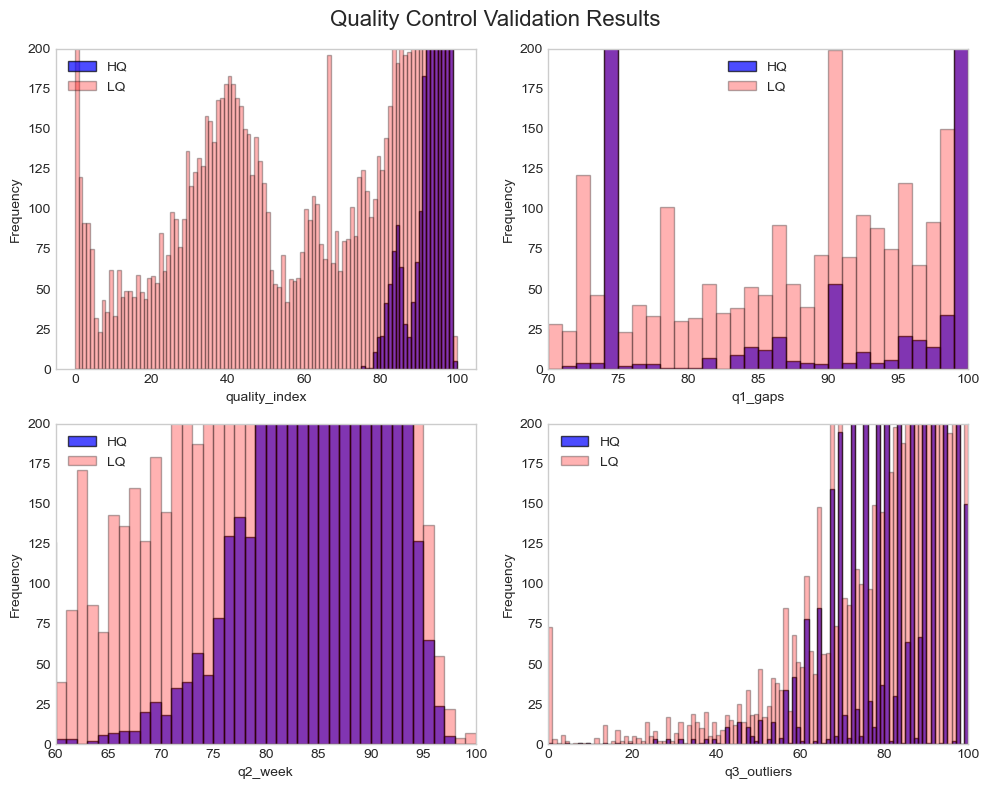

In [340]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), facecolor = None)

variable = 'quality_index'
df_hq = df_compare[df_compare['visual_quality'] == 'HQ']
df_lq = df_compare[df_compare['visual_quality'] == 'LQ']
p_availability_hq = df_hq[variable].mean()
p_availability_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1  # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[0, 0].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[0, 0].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
# axs[0, 0].set_xlim(90, 100)
axs[0, 0].set_ylim(0, 200)

axs[0, 0].legend()
axs[0, 0].set_xlabel(variable)
axs[0, 0].set_ylabel('Frequency')

variable = 'q1_gaps'
df_hq = df_compare[df_compare['visual_quality'] == 'HQ']
df_lq = df_compare[df_compare['visual_quality'] == 'LQ']
q1_gaps_hq = df_hq[variable].mean()
q1_gaps_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1  # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[0, 1].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[0, 1].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
axs[0, 1].set_xlim(70, 100)
axs[0, 1].set_ylim(0, 200)

axs[0, 1].legend()  
axs[0, 1].set_xlabel(variable)
axs[0, 1].set_ylabel('Frequency')

variable = 'q2_week'
df_hq = df_compare[df_compare['visual_quality'] == 'HQ']
df_lq = df_compare[df_compare['visual_quality'] == 'LQ']
q2_gaps_hq = df_hq[variable].mean()
q2_gaps_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1  # Adjust as needed
# Calculate bin edges    
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[1, 0].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[1, 0].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
axs[1, 0].set_xlim(60, 100)
axs[1, 0].set_ylim(0, 200)

axs[1, 0].legend()
axs[1, 0].set_xlabel(variable)
axs[1, 0].set_ylabel('Frequency')

variable = 'q3_outliers'
df_hq = df_compare[df_compare['visual_quality'] == 'HQ']
df_lq = df_compare[df_compare['visual_quality'] == 'LQ']
q3_gaps_hq = df_hq[variable].mean()
q3_gaps_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1  # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
axs[1, 1].hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
axs[1, 1].hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
axs[1, 1].set_xlim(0, 100)
axs[1, 1].set_ylim(0, 200)

axs[1, 1].legend()
axs[1, 1].set_xlabel(variable)
axs[1, 1].set_ylabel('Frequency')

plt.suptitle('Quality Control Validation Results', fontsize=16)

plt.tight_layout()
plt.savefig(r".\Figures\cemaden_qcp_result.tiff", transparent=False, format='tiff', dpi=1200, bbox_inches='tight' )
plt.show()
plt.close()

In [341]:
df_compare.to_excel(r'.\5 - Results\df_qualidade_cemaden.xlsx', index=False, sheet_name='data')

In [342]:
# Example confusion matrix data (replace this with your actual data)
actual = np.array(df_compare['visual_quality'].values.tolist())
predicted = np.array(df_compare['final_classif'].values.tolist())

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)

# Normalize to percentages
row_sums = confusion_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
confusion_matrix_percentage = confusion_matrix.astype('float') / row_sums[:, np.newaxis] * 100
confusion_matrix_percentage

array([[91.32743363,  8.67256637],
       [35.26056521, 64.73943479]])

In [343]:
confusion_matrix

array([[6708,  637],
       [5440, 9988]], dtype=int64)

In [ ]:
TP, FN = confusion_matrix[0, 0], confusion_matrix[0, 1]
FP, TN = confusion_matrix[1, 0], confusion_matrix[1, 1]

precision = TP / (TP + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)

print("Precision:", f"{precision:.3f}")
print("Accuracy:", f"{accuracy:.3f}")
print("Recall:", f"{recall:.3f}")

# Precision: 0.5966476756667493
# Accuracy: 0.7802661045975497
# Recall: 0.9837985023825732

# Precision: 0.552
# Accuracy: 0.733
# Recall: 0.913

Precision: 0.552
Accuracy: 0.733
Recall: 0.913


In [345]:
mc00 = ("("+str(round(confusion_matrix_percentage[0][0], 1))+"%)")
mc01 = ("("+str(round(confusion_matrix_percentage[0][1], 1))+"%)")
mc10 = ("("+str(round(confusion_matrix_percentage[1][0], 1))+"%)")
mc11 = ("("+str(round(confusion_matrix_percentage[1][1], 1))+"%)")
print(mc00, mc01, mc10, mc11)

(91.3%) (8.7%) (35.3%) (64.7%)


<Figure size 550x450 with 0 Axes>

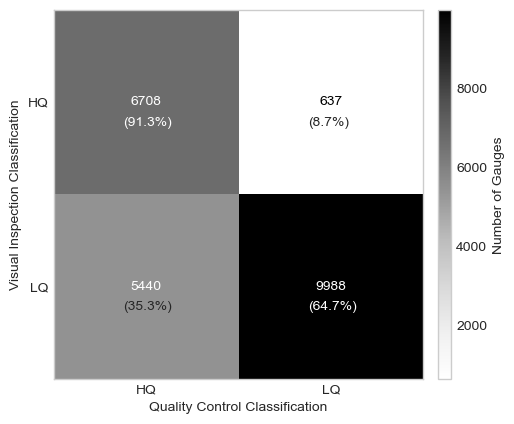

In [346]:
# Set the figure size
plt.figure(figsize=(5.5, 4.5))

actual = np.array(df_compare['visual_quality'].values.tolist())
predicted = np.array(df_compare['final_classif'].values.tolist())

# Calculate confusion matrix
confusion_matrix = metrics.confusion_matrix(actual, predicted)
# Normalize to percentages
row_sums = confusion_matrix.sum(axis=1)
row_sums[row_sums == 0] = 1  # Avoid division by zero
# confusion_matrix_percentage = confusion_matrix.astype('float') / row_sums[:, np.newaxis] * 100

# Display labels
class_names = ['HQ','LQ']

# Plotting the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)
cm_display.plot(cmap='Greys', values_format='.0f', include_values=True, colorbar=False)

plt.text(-0.125, 0.125, mc00, fontsize=10, color = 'white')
plt.text(0.875, 0.125, mc01, fontsize=10)
plt.text(-0.125, 1.125, mc10, fontsize=10)
plt.text(0.875, 1.125, mc11, fontsize=10, color = 'white')
# Change axes names
plt.ylabel('Visual Inspection Classification')
plt.xlabel('Quality Control Classification')
# plt.title('Confusion Matrix of the QCP (%)', pad = 5)

# Get the current figure and create axes for the color bar
fig = plt.gcf()
cax = fig.add_axes([0.825, 0.11, 0.02, 0.77])  # [left, bottom, width, height]

# Plot the color bar using the existing mappable
cbar = plt.colorbar(cm_display.im_, cax=cax)
cbar.set_label('Number of Gauges')
# cbar.set_ticks([0, 25, 50, 75, 100])

# plt.tight_layout()
plt.savefig('./figures/cemaden_confusion_matrix.tiff', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [347]:
confusion_matrix_percentage

array([[91.32743363,  8.67256637],
       [35.26056521, 64.73943479]])

In [348]:
for year in df_compare['year'].drop_duplicates().values.tolist():
    df_year = df_compare[df_compare['year'] == year]
    count_hq_hq = ((df_year['final_classif'] == 'HQ') & (df_year['visual_quality'] == 'HQ')).sum()
    count_hq_lq = ((df_year['final_classif'] == 'HQ') & (df_year['visual_quality'] == 'LQ')).sum()
    count_lq_hq = ((df_year['final_classif'] == 'LQ') & (df_year['visual_quality'] == 'HQ')).sum()
    count_lq_lq = ((df_year['final_classif'] == 'LQ') & (df_year['visual_quality'] == 'LQ')).sum()

    sucess = (count_hq_hq + count_lq_lq) / (len(df_year))
    print(year, sucess, count_hq_hq+count_hq_lq+count_lq_hq+ count_lq_lq - len(df_year))

2014 0.8111814345991561 0
2015 0.7732630272952854 0
2016 0.6737096287352853 0
2017 0.7121951219512195 0
2018 0.7466075156576201 0
2019 0.7003434459072696 0
2020 0.7489373760272032 0


In [349]:
count_hq_hq = ((df_compare['final_classif'] == 'HQ') & (df_compare['visual_quality'] == 'HQ')).sum()
count_hq_lq = ((df_compare['final_classif'] == 'HQ') & (df_compare['visual_quality'] == 'LQ')).sum()
count_lq_hq = ((df_compare['final_classif'] == 'LQ') & (df_compare['visual_quality'] == 'HQ')).sum()
count_lq_lq = ((df_compare['final_classif'] == 'LQ') & (df_compare['visual_quality'] == 'LQ')).sum()

sucess = (count_hq_hq + count_lq_lq) / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
sucess

73.31489044043384

In [350]:
count_by_quality_label = df_compare.groupby('quality_label')['quality_label'].count().reset_index(name='count')

# Print or use the resulting DataFrame
print(count_by_quality_label)

            quality_label  count
0   1 - Excellent Quality  11636
1        2 - Good Quality   1059
2  3 - Acceptable Quality     21
3    5 - Very Low Quality  10057


In [351]:
count_by_quality_label['count'].sum()

22773

In [352]:
count_pivot = df_compare.pivot_table(index='quality_label', columns='visual_quality', aggfunc='size', fill_value=0)
count_pivot.reset_index(drop = False, inplace = True)
count_pivot

visual_quality,quality_label,HQ,LQ
0,1 - Excellent Quality,6530,5106
1,2 - Good Quality,189,870
2,3 - Acceptable Quality,0,21
3,5 - Very Low Quality,626,9431


In [353]:
type_error_1 = count_lq_hq / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
print(type_error_1, "%")

2.7971720897554118 %


In [354]:
type_error_2 = count_hq_lq / (count_hq_hq + count_lq_hq + count_hq_lq + count_lq_lq) * 100
print(type_error_2, "%")

23.88793746981074 %
